In [1]:
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
print(parent_dir)
sys.path.append(parent_dir)

/home/jiezi/Code/GitHub/ResearchRetrospect/wip


In [2]:
title = "HippoRAG: Neurobiologically Inspired Long-Term Memory for Large Language Models"

# Research Tree

Generate most important and relevant researches and formalize research tree.

## Start Point

Take a recent HippoRAG paper for example. 
- It rooted in RAG;
- Some of the key researchs like GraphRAG should be included;
- Better to have related works in llm memory and llm reasoning.

### Original Title Search

In [4]:
from apis.semanticscholar_tool import SemanticScholarKit

s2 = SemanticScholarKit()
s2_metadata = s2.search_paper_by_keywords(query=title, limit=100)

paper_s2_id = s2_metadata[0].get('paperId')
print(paper_s2_id)

citing_metadata = s2.get_semanticscholar_references(paper_id=paper_s2_id, limit=100)
print(len(citing_metadata))

citedby_metadata = s2.get_semanticscholar_citedby(paper_id=paper_s2_id, limit=100)
print(len(citedby_metadata))

paper_recommended_info = s2.find_recommendations(positive_paper_ids=[paper_s2_id])
print(len(paper_recommended_info))

2025-03-10 09:54:04,581 - INFO - HTTP Request: GET https://api.semanticscholar.org/graph/v1/paper/search?query=HippoRAG%3A+Neurobiologically+Inspired+Long-Term+Memory+for+Large+Language+Models&fields=abstract%2Cauthors%2CcitationCount%2CcitationStyles%2CcorpusId%2CexternalIds%2CfieldsOfStudy%2CinfluentialCitationCount%2CisOpenAccess%2Cjournal%2CopenAccessPdf%2CpaperId%2CpublicationDate%2CpublicationTypes%2CpublicationVenue%2CreferenceCount%2Cs2FieldsOfStudy%2Ctitle%2Curl%2Cvenue%2Cyear&offset=0&limit=100 "HTTP/1.1 200 OK"


4308208fac24626e0c927ee728038aadc4e87266


2025-03-10 09:54:06,047 - INFO - HTTP Request: GET https://api.semanticscholar.org/graph/v1/paper/4308208fac24626e0c927ee728038aadc4e87266/references?fields=contexts%2Cintents%2CcontextsWithIntent%2CisInfluential%2Cabstract%2Cauthors%2CcitationCount%2CcitationStyles%2CcorpusId%2CexternalIds%2CfieldsOfStudy%2CinfluentialCitationCount%2CisOpenAccess%2Cjournal%2CopenAccessPdf%2CpaperId%2CpublicationDate%2CpublicationTypes%2CpublicationVenue%2CreferenceCount%2Cs2FieldsOfStudy%2Ctitle%2Curl%2Cvenue%2Cyear&offset=0&limit=100 "HTTP/1.1 429 "
2025-03-10 09:54:38,789 - INFO - HTTP Request: GET https://api.semanticscholar.org/graph/v1/paper/4308208fac24626e0c927ee728038aadc4e87266/references?fields=contexts%2Cintents%2CcontextsWithIntent%2CisInfluential%2Cabstract%2Cauthors%2CcitationCount%2CcitationStyles%2CcorpusId%2CexternalIds%2CfieldsOfStudy%2CinfluentialCitationCount%2CisOpenAccess%2Cjournal%2CopenAccessPdf%2CpaperId%2CpublicationDate%2CpublicationTypes%2CpublicationVenue%2CreferenceCount%

76


2025-03-10 09:54:43,193 - INFO - HTTP Request: GET https://api.semanticscholar.org/graph/v1/paper/4308208fac24626e0c927ee728038aadc4e87266/citations?fields=contexts%2Cintents%2CcontextsWithIntent%2CisInfluential%2Cabstract%2Cauthors%2CcitationCount%2CcitationStyles%2CcorpusId%2CexternalIds%2CfieldsOfStudy%2CinfluentialCitationCount%2CisOpenAccess%2Cjournal%2CopenAccessPdf%2CpaperId%2CpublicationDate%2CpublicationTypes%2CpublicationVenue%2CreferenceCount%2Cs2FieldsOfStudy%2Ctitle%2Curl%2Cvenue%2Cyear&offset=0&limit=100 "HTTP/1.1 200 OK"


17


2025-03-10 09:54:49,028 - INFO - HTTP Request: POST https://api.semanticscholar.org/recommendations/v1/papers/?fields=abstract%2Cauthors%2CcitationCount%2CcitationStyles%2CcorpusId%2CexternalIds%2CfieldsOfStudy%2CinfluentialCitationCount%2CisOpenAccess%2Cjournal%2CopenAccessPdf%2CpaperId%2CpublicationDate%2CpublicationTypes%2CpublicationVenue%2CreferenceCount%2Cs2FieldsOfStudy%2Ctitle%2Curl%2Cvenue%2Cyear&limit=100 "HTTP/1.1 200 OK"


100


In [47]:
s2_metadata[0].keys()

dict_keys(['paperId', 'externalIds', 'corpusId', 'publicationVenue', 'url', 'title', 'abstract', 'venue', 'year', 'referenceCount', 'citationCount', 'influentialCitationCount', 'isOpenAccess', 'openAccessPdf', 'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes', 'publicationDate', 'journal', 'citationStyles', 'authors', 'relationship', 'description', 'query', 'source'])

In [48]:
s2_metadata[0]['year']

2024

In [49]:
s2_metadata[0]['publicationDate']

'2024-05-23'

In [51]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

month_range = 36  # months to track for papers

publish_dt = datetime.strptime(s2_metadata[0]['publicationDate'], "%Y-%m-%d")
from_dt = (publish_dt - relativedelta(months=month_range)).strftime('%Y-%m-%d') 
to_dt = (publish_dt + relativedelta(months=month_range)).strftime('%Y-%m-%d') 
print(from_dt, to_dt)

2021-05-23 2027-05-23


In [ ]:
# store and process all potential papers
doi_id_pool = set()
extended_paper_info = []

In [ ]:
# for papers from initial search 
for item in s2_metadata:
    # set up paper doi
    paper_id = item.get('paperId')
    if paper_id is not None:
        doi = item.get('externalIds',{}).get('DOI')
        arxiv_id = item.get('externalIds',{}).get('ArXiv')
        publish_dt = item.get('publicationDate', '2000-01-01')
        if doi is None:
            if arxiv_id is not None:
                doi = f"10.48550/arXiv.{arxiv_id}"  # assign 10.48550/arXiv. for arxiv id https://info.arxiv.org/help/doi.html
            else:
                doi = paper_id

        if doi not in doi_id_pool and (publish_dt > from_dt and publish_dt < to_dt):
            item['relationship'] = "title search"
            item['description'] = "initial search in semantic scholar by paper title"
            item['query'] = title
            item['source'] = "semantic_scholar"
            extended_paper_info.append(item)
            doi_id_pool.add(doi)

In [ ]:
print(len(extended_paper_info), len(doi_id_pool))

1 1


In [ ]:
# for citing papers
for item in citing_metadata:
    item = item.get('citedPaper', {})
    # set up paper doi
    paper_id = item.get('paperId')
    if paper_id is not None:
        doi = item.get('externalIds',{}).get('DOI')
        arxiv_id = item.get('externalIds',{}).get('ArXiv')
        publish_dt = item.get('publicationDate', '2000-01-01')
        if doi is None:
            if arxiv_id is not None:
                doi = f"10.48550/arXiv.{arxiv_id}"  # assign 10.48550/arXiv. for arxiv id https://info.arxiv.org/help/doi.html
            else:
                doi = paper_id

        if doi not in doi_id_pool and (publish_dt > from_dt and publish_dt < to_dt):
            item['relationship'] = "citing"
            item['description'] = "original paper citing this paper"
            item['query'] = title
            item['source'] = "semantic_scholar"
            extended_paper_info.append(item)
            doi_id_pool.add(doi)

In [31]:
print(len(extended_paper_info), len(doi_id_pool))

74 74


In [ ]:
# for cited by papoers
for item in citedby_metadata:
    item = item.get('citingPaper', {})
    # set up paper doi
    paper_id = item.get('paperId')
    if paper_id is not None:
        doi = item.get('externalIds',{}).get('DOI')
        arxiv_id = item.get('externalIds',{}).get('ArXiv')
        publish_dt = item.get('publicationDate', '2000-01-01')
        if doi is None:
            if arxiv_id is not None:
                doi = f"10.48550/arXiv.{arxiv_id}"  # assign 10.48550/arXiv. for arxiv id https://info.arxiv.org/help/doi.html
            else:
                doi = paper_id

        if doi not in doi_id_pool and (publish_dt > from_dt and publish_dt < to_dt):
            item['relationship'] = "citedby"
            item['description'] = "original paper cited by this paper"
            item['query'] = title
            item['source'] = "semantic_scholar"
            extended_paper_info.append(item)
            doi_id_pool.add(doi)

In [33]:
print(len(extended_paper_info), len(doi_id_pool))

91 91


In [ ]:
# for recommended papers
for item in paper_recommended_info:
    # set up paper doi
    paper_id = item.get('paperId')
    if paper_id is not None:
        doi = item.get('externalIds',{}).get('DOI')
        arxiv_id = item.get('externalIds',{}).get('ArXiv')
        publish_dt = item.get('publicationDate', '2000-01-01')
        if doi is None:
            if arxiv_id is not None:
                doi = f"10.48550/arXiv.{arxiv_id}"  # assign 10.48550/arXiv. for arxiv id https://info.arxiv.org/help/doi.html
            else:
                doi = paper_id

        if doi not in doi_id_pool and (publish_dt > from_dt and publish_dt < to_dt):
            item['relationship'] = "title search"
            item['description'] = "initial search in semantic scholar by paper title"
            item['query'] = title
            item['source'] = "semantic_scholar"
            extended_paper_info.append(item)
            doi_id_pool.add(doi)

### Expand to Other Papers by Same Author

In [18]:
authors = s2_metadata[0].get('authors')

In [19]:
author_ids = [x.get('authorId') for x in authors if x.get('authorId') is not None]

In [11]:
from semanticscholar import SemanticScholar
sch = SemanticScholar()
authors_metadata = sch.get_authors(author_ids)

2025-03-10 09:55:52,619 - INFO - HTTP Request: POST https://api.semanticscholar.org/graph/v1/author/batch?fields=affiliations%2CauthorId%2CcitationCount%2CexternalIds%2ChIndex%2Chomepage%2Cname%2CpaperCount%2Cpapers%2Cpapers.abstract%2Cpapers.authors%2Cpapers.citationCount%2Cpapers.corpusId%2Cpapers.externalIds%2Cpapers.fieldsOfStudy%2Cpapers.influentialCitationCount%2Cpapers.isOpenAccess%2Cpapers.journal%2Cpapers.openAccessPdf%2Cpapers.paperId%2Cpapers.publicationDate%2Cpapers.publicationTypes%2Cpapers.publicationVenue%2Cpapers.referenceCount%2Cpapers.s2FieldsOfStudy%2Cpapers.title%2Cpapers.url%2Cpapers.venue%2Cpapers.year%2Curl "HTTP/1.1 200 OK"


In [24]:
print(len(authors_metadata), len(author_ids))

5 5


In [55]:
for idx, author in enumerate(authors_metadata):
    if idx < 5:
        author_id = author.authorId
        papers = author.papers 
        if papers is not None and papers != []:
            for item in papers:
                item = item.__dict__['_data']
                # set up paper doi
                paper_id = item.get('paperId')
                if paper_id is not None:
                    doi = item.get('externalIds',{}).get('DOI')
                    arxiv_id = item.get('externalIds',{}).get('ArXiv')
                    publish_dt = item['publicationDate']
                    if publish_dt is None:
                        publish_dt = f"{item['year']}-01-01" if item['year'] is not None else '2000-01-01'

                    if doi is None:
                        if arxiv_id is not None:
                            doi = f"10.48550/arXiv.{arxiv_id}"  # assign 10.48550/arXiv. for arxiv id https://info.arxiv.org/help/doi.html
                        else:
                            doi = paper_id

                    if doi not in doi_id_pool and (publish_dt > from_dt and publish_dt < to_dt):
                        item['relationship'] = "author search"
                        item['description'] = "other papers from same author"
                        item['query'] = author_id
                        item['source'] = "semantic_scholar"
                        extended_paper_info.append(item)
                        doi_id_pool.add(doi)

In [56]:
print(len(extended_paper_info), len(doi_id_pool))

214 214


## Keywords & Topics Expansion

### Extract keywords and topics

In [57]:
title = s2_metadata[0].get('title')
abstract = s2_metadata[0].get('abstract')

In [58]:
domains = ", ".join(s2_metadata[0].get('fieldsOfStudy'))

In [74]:
keywords_topics_example = {
    "field_of_study": ["Political Science", "Social Media Studies", "Communication Studies", "Sociology, Digital Culture"],
    "keywords_and_topics": ["social media usage", "political polarization", "mixed-methods approach", "semi-structured interviews"],
    "tags": ["online behavior", "echo chambers", "survey methodology", "young adults", "political communication", "digital ethnography", "ideology"],
    "queries": ["youth political polarization", "youth social media usage", "'online behavior' AND 'ideology'"]
}

keywords_topics_prompt = """You are a sophisticated academic scholar with expertise in {domain}. 
You are renowned for your ability to quickly grasp the core concepts of research papers and expertly categorize and tag information for optimal organization and retrieval.

## TASK
When presented with title and abstraction of a research paper, you will meticulously analyze its content and provide the following:
- field_of_study: Propose 2-4 detailed academic fields that this research would logically fall under. Consider the interdisciplinary nature of the paragraph as well.
- keywords_and_topics: Identify 3-5 key terms, phrases or topics that accurately capture the specific subject matter and central ideas discussed within the paragraph. These keywords should be highly relevant and representative within the specific research area.
- tags: Suggest 3-5 concise tags that could be used to further refine the indexing and searchability of the paragraph. These tags might include specific methodologies, theories, named entities, or emerging concepts mentioned within the text. They should be specific enough to differentiate the content from the broader categories.
- queries: based on the above information, compose 2-4 queries to search from Google Scholar for more research work (not restrict to this paper) on related topics.

Make sure you output in json with double quotes.

## EXAMPLE
Here is an example for demonstraction purpose only. Do not use this specific example in your response, it is solely illustrative.

Input Paragraph:  
<title>  Social media usage heighten political polarization in youth - A quantitative study</title>
<abstract>
"This study employed a mixed-methods approach to investigate the impact of social media usage on political polarization among young adults in urban areas. 
Quantitative data was collected through a survey of 500 participants, while qualitative data was gathered via semi-structured interviews with a subset of 25 participants. 
The findings suggest a correlation between increased exposure to ideologically homogeneous content online and heightened political polarization."
</abstract>

Hypothetical Output from this Example (Again, illustrative and not to be used in the actual response):
```json
{example_json}
```

## INSTRUCTIONS
1. Be precise with keywords and topics, avoid overly broad or generic terms.
2. Prioritize terms that are most representative and distinctive for the paper.

## INPUT
Now start analyzing the following paper.
<title> {title} </title>
<abstract>
{abstract}
</abstract>

## OUTPUT

"""

In [75]:
from models.llms import llm_gen_w_retry

temperature = 0.1
gemini_api_key = os.getenv('GEMINI_API_KEY_1')
gemini_model_name = "gemini-2.0-flash"
qa_prompt = keywords_topics_prompt.format(
    domain = domains,
    example_json = keywords_topics_example,
    title = title,
    abstract = abstract
)

In [76]:
keywords_topics_info = llm_gen_w_retry(gemini_api_key, gemini_model_name, qa_prompt, sys_prompt=None, temperature=0.6)

2025-03-10 10:57:24,931 - INFO - AFC is enabled with max remote calls: 10.
2025-03-10 10:57:27,195 - INFO - AFC remote call 1 is done.


In [77]:
import json
from json_repair import repair_json  # https://github.com/mangiucugna/json_repair/

keywords_topics_json = json.loads(repair_json(keywords_topics_info))
field_of_study = keywords_topics_json.get('field_of_study')
keywords_and_topics = keywords_topics_json.get('keywords_and_topics')
tags = keywords_topics_json.get('tags')
queries = keywords_topics_json.get('queries')

In [78]:
field_of_study, keywords_and_topics, tags, queries

(['Natural Language Processing',
  'Artificial Intelligence',
  'Cognitive Science',
  'Machine Learning'],
 ['Large Language Models (LLMs)',
  'Retrieval-Augmented Generation (RAG)',
  'Long-Term Memory',
  'Hippocampal Indexing Theory',
  'Knowledge Integration',
  'Personalized PageRank',
  'HippoRAG'],
 ['Multi-hop Question Answering',
  'Catastrophic Forgetting',
  'Neurobiologically Inspired AI',
  'Iterative Retrieval (IRCoT)',
  'Knowledge Graphs',
  'Neocortex',
  'Hippocampus'],
 ['neurobiologically inspired memory models for LLMs',
  'knowledge graph enhanced retrieval for LLMs',
  'long-term memory in large language models',
  'comparison of RAG methods for multi-hop question answering'])

### Search for paper information by keywords and topics

In [79]:
import time
related_papers_metadata = []
for query in queries:
    paper_meta = s2.search_paper_by_keywords(query=query, limit=100)
    related_papers_metadata.append(paper_meta)
    time.sleep(10)

2025-03-10 10:57:53,046 - INFO - HTTP Request: GET https://api.semanticscholar.org/graph/v1/paper/search?query=neurobiologically+inspired+memory+models+for+LLMs&fields=abstract%2Cauthors%2CcitationCount%2CcitationStyles%2CcorpusId%2CexternalIds%2CfieldsOfStudy%2CinfluentialCitationCount%2CisOpenAccess%2Cjournal%2CopenAccessPdf%2CpaperId%2CpublicationDate%2CpublicationTypes%2CpublicationVenue%2CreferenceCount%2Cs2FieldsOfStudy%2Ctitle%2Curl%2Cvenue%2Cyear&offset=0&limit=100 "HTTP/1.1 200 OK"
2025-03-10 10:58:05,126 - INFO - HTTP Request: GET https://api.semanticscholar.org/graph/v1/paper/search?query=knowledge+graph+enhanced+retrieval+for+LLMs&fields=abstract%2Cauthors%2CcitationCount%2CcitationStyles%2CcorpusId%2CexternalIds%2CfieldsOfStudy%2CinfluentialCitationCount%2CisOpenAccess%2Cjournal%2CopenAccessPdf%2CpaperId%2CpublicationDate%2CpublicationTypes%2CpublicationVenue%2CreferenceCount%2Cs2FieldsOfStudy%2Ctitle%2Curl%2Cvenue%2Cyear&offset=0&limit=100 "HTTP/1.1 429 "
2025-03-10 10:58

In [80]:
print(len(related_papers_metadata), len(queries))

4 4


In [82]:
for idx, papers in enumerate(related_papers_metadata):
    # set up paper doi
    query = queries[idx]
    for item in papers:
        paper_id = item.get('paperId')
        doi = item.get('externalIds',{}).get('DOI')
        arxiv_id = item.get('externalIds',{}).get('ArXiv')
        publish_dt = item['publicationDate']
        if publish_dt is None:
            publish_dt = f"{item['year']}-01-01" if item['year'] is not None else '2000-01-01'
            
        if doi is None:
            if arxiv_id is not None:
                doi = f"10.48550/arXiv.{arxiv_id}"  # assign 10.48550/arXiv. for arxiv id https://info.arxiv.org/help/doi.html
            else:
                doi = paper_id

        if doi not in doi_id_pool and (publish_dt > from_dt and publish_dt < to_dt):
            item['relationship'] = "related"
            item['description'] = "this paper shares keywords / topic with orginal paper"
            item['query'] = query
            item['source'] = "semantic_scholar"
            extended_paper_info.append(item)
            doi_id_pool.add(doi)   

In [83]:
print(len(extended_paper_info), len(doi_id_pool))

488 488


### Expansion from Other Sources

TODO: from sources like Github, huggingface, paper with code

## Embedding & Filtering

- First embedding based on title and abstract.
- Then utilize semantic similarity to get rid of irrelevant papers.

In [84]:
from models.embedding_models import gemini_embedding_async

gemini_api_key = os.getenv('GEMINI_API_KEY_1')
gemini_embed_mdl_name = "models/text-embedding-004"

target_info = f"TITLE: {s2_metadata[0].get('title')} \nABSTRACT: {s2_metadata[0].get('abstract')}"
print(target_info)

TITLE: HippoRAG: Neurobiologically Inspired Long-Term Memory for Large Language Models 
ABSTRACT: In order to thrive in hostile and ever-changing natural environments, mammalian brains evolved to store large amounts of knowledge about the world and continually integrate new information while avoiding catastrophic forgetting. Despite the impressive accomplishments, large language models (LLMs), even with retrieval-augmented generation (RAG), still struggle to efficiently and effectively integrate a large amount of new experiences after pre-training. In this work, we introduce HippoRAG, a novel retrieval framework inspired by the hippocampal indexing theory of human long-term memory to enable deeper and more efficient knowledge integration over new experiences. HippoRAG synergistically orchestrates LLMs, knowledge graphs, and the Personalized PageRank algorithm to mimic the different roles of neocortex and hippocampus in human memory. We compare HippoRAG with existing RAG methods on mult

In [102]:
texts = []
candit_paper_info = []
for item in extended_paper_info:
    if item.get('title') is not None and item.get('abstract') is not None:
        texts.append(f"TITLE: {item.get('title')} \nABSTRACT: {item.get('abstract')}")
        candit_paper_info.append(item)

In [92]:
all_embeds = await gemini_embedding_async(gemini_api_key, gemini_embed_mdl_name, texts, 10)

In [93]:
import numpy as np
from models.embedding_models import semantic_similarity_matrix

similarity_matrix = semantic_similarity_matrix(all_embeds[0], all_embeds[1:])
similarity_matrix = np.array(similarity_matrix)

In [95]:
sims = similarity_matrix[0].tolist()

In [96]:
print(len(texts), len(sims))

473 472


/home/jiezi/miniconda3/envs/ai4fun/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiezi/miniconda3/envs/ai4fun/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiezi/miniconda3/envs/ai4fun/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiezi/miniconda3/envs/ai4fun/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiezi/miniconda3/envs/ai4fun/lib/python3.10/site-packages/IPython/core/pyl

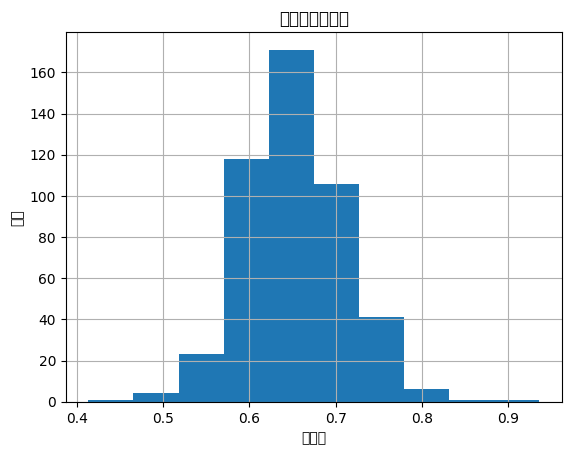

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# 使用 matplotlib 创建直方图
plt.hist(sims, bins=10)  # bins 参数可以调整柱子的数量
plt.xlabel('数据值')
plt.ylabel('频数')
plt.title('数据分布直方图')
plt.grid(True) # 添加网格线，可选
plt.show()

In [104]:
filtered_paper_metadata = []
filtered_embedings = []

for idx, item in enumerate(candit_paper_info[1:]):
    if sims[idx] > 0.7:
        filtered_paper_metadata.append(item)
        filtered_embedings.append(all_embeds[idx])

print(len(filtered_paper_metadata), len(filtered_embedings))

96 96


In [108]:
i = 0 
for item in filtered_paper_metadata:
    if item.get('relationship') in ['related', 'recommended']:
        print(item.get('query'), item.get('title'))
        i += 1
print(i)

neurobiologically inspired memory models for LLMs MemoRAG: Moving towards Next-Gen RAG Via Memory-Inspired Knowledge Discovery
neurobiologically inspired memory models for LLMs Cogito, ergo sum: A Neurobiologically-Inspired Cognition-Memory-Growth System for Code Generation
neurobiologically inspired memory models for LLMs Cognitive Personalized Search Integrating Large Language Models with an Efficient Memory Mechanism
neurobiologically inspired memory models for LLMs Larimar: Large Language Models with Episodic Memory Control
neurobiologically inspired memory models for LLMs RET-LLM: Towards a General Read-Write Memory for Large Language Models
neurobiologically inspired memory models for LLMs GraphInsight: Unlocking Insights in Large Language Models for Graph Structure Understanding
neurobiologically inspired memory models for LLMs GIVE: Structured Reasoning of Large Language Models with Knowledge Graph Inspired Veracity Extrapolation
neurobiologically inspired memory models for LLM

In [105]:
for item in filtered_paper_metadata:
    print(item.get('title'))

From Local to Global: A Graph RAG Approach to Query-Focused Summarization
RAPTOR: Recursive Abstractive Processing for Tree-Organized Retrieval
Reasoning on Graphs: Faithful and Interpretable Large Language Model Reasoning
Enhancing Retrieval-Augmented Large Language Models with Iterative Retrieval-Generation Synergy
Active Retrieval Augmented Generation
In-Context Retrieval-Augmented Language Models
Interleaving Retrieval with Chain-of-Thought Reasoning for Knowledge-Intensive Multi-Step Questions
Deep Bidirectional Language-Knowledge Graph Pretraining
Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks
Think-on-Graph: Deep and Responsible Reasoning of Large Language Model with Knowledge Graph
RAS: Retrieval-And-Structuring for Knowledge-Intensive LLM Generation
VideoRAG: Retrieval-Augmented Generation with Extreme Long-Context Videos
Human-inspired Perspectives: A Survey on AI Long-term Memory
Inference Scaling for Long-Context Retrieval Augmented Generation
Reward-RAG: 

Filtering by threshold, however, may incur major information loss, since:
- the semantic similarity at its best only suggests "similar" paper. 
- Other related papers, like papers in citation chain would be lost. 

In [121]:
print(len(citing_metadata))
i = 0
for item in citing_metadata:
    if item.get('citedPaper') not in filtered_paper_metadata:
        i += 1 
print(i)


print(len(citedby_metadata))
j = 0
for item in citedby_metadata:
    if item.get('citingPaper') not in filtered_paper_metadata:
        j += 1 
print(j)

76
68
16
7


### Clustering and Community Detection

How to conduct community detection with both graph characteristcs and key information embeddings?

In [113]:
from sklearn.cluster import KMeans

num_clusters = 5  #  设置聚类的数量， 这通常需要根据实际情况调整
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10) # 显式设置 n_init
clusters = kmeans.fit_predict(filtered_embedings)

# 步骤 5:  展示聚类结果
print("聚类结果:")
for i in range(num_clusters):
    print("="*40)
    print(f"\nCluster {i}:")
    for sentence_id, cluster_id in enumerate(clusters):
        if cluster_id == i:
            print(f"- {filtered_paper_metadata[sentence_id].get('title')}")

聚类结果:

Cluster 0:
- A-MEM: Agentic Memory for LLM Agents
- Attention in Large Language Models Yields Efficient Zero-Shot Re-Rankers
- Vector Storage Based Long-term Memory Research on LLM
- Evaluating Very Long-Term Conversational Memory of LLM Agents
- Improving Long-Term Conversational Abilities of Large Language Models Through Behavior Memory
- Recursively Summarizing Enables Long-Term Dialogue Memory in Large Language Models
- Leveraging Memory Retrieval to Enhance LLM-based Generative Recommendation
- MemoRAG: Moving towards Next-Gen RAG Via Memory-Inspired Knowledge Discovery
- Cognitive Personalized Search Integrating Large Language Models with an Efficient Memory Mechanism
- FragRel: Exploiting Fragment-level Relations in the External Memory of Large Language Models
- Compressing Long Context for Enhancing RAG with AMR-based Concept Distillation
- Audiobox TTA-RAG: Improving Zero-Shot and Few-Shot Text-To-Audio with Retrieval-Augmented Generation
- Domain Adaptation for Convers

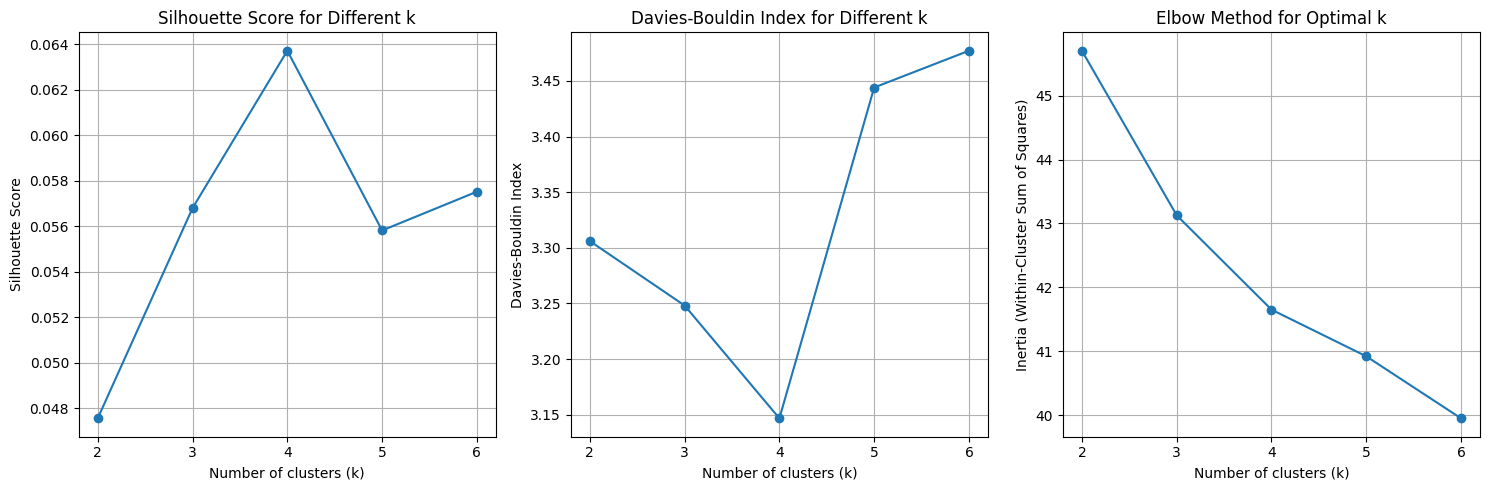


聚类评估指标:
k=2: Silhouette Score: 0.0476, Davies-Bouldin Index: 3.3061, Inertia: 45.7039
k=3: Silhouette Score: 0.0568, Davies-Bouldin Index: 3.2482, Inertia: 43.1277
k=4: Silhouette Score: 0.0637, Davies-Bouldin Index: 3.1468, Inertia: 41.6514
k=5: Silhouette Score: 0.0558, Davies-Bouldin Index: 3.4440, Inertia: 40.9208
k=6: Silhouette Score: 0.0575, Davies-Bouldin Index: 3.4771, Inertia: 39.9500

基于 Silhouette Score, 建议的最优 k 值为: 4
基于 Davies-Bouldin Index, 建议的最优 k 值为: 4

请参考 Elbow Method 图表， 综合评估并选择最终的 k 值。

使用最优 k 值 (4) 的聚类结果:

Cluster 0:
- Cogito, ergo sum: A Neurobiologically-Inspired Cognition-Memory-Growth System for Code Generation
- Compressing Long Context for Enhancing RAG with AMR-based Concept Distillation
- Audiobox TTA-RAG: Improving Zero-Shot and Few-Shot Text-To-Audio with Retrieval-Augmented Generation
- RAG-Inspired Robotic Task Planning Using Large Language Models
- AtomR: Atomic Operator-Empowered Large Language Models for Heterogeneous Knowledge Reasoning
- Analyzing

In [115]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

# 步骤 4: 尝试不同的 k 值并评估聚类指标
silhouette_scores = []
davies_bouldin_scores = []
inertia_values = []  # 用于 Elbow Method
k_values = range(2, 7)  #  尝试 k 从 2 到 6， 你可以根据需要调整范围

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    clusters = kmeans.fit_predict(filtered_embedings)
    inertia_values.append(kmeans.inertia_) #  inertia_ 对应 KMeans 的 Within-Cluster Sum of Squares (WCSS)

    #  计算 Silhouette Score,  注意需要处理簇的数量少于 2 的情况
    if len(set(clusters)) > 1: # 确保簇的数量大于 1 才能计算 Silhouette Score
        silhouette_avg = silhouette_score(filtered_embedings, clusters)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(np.nan) #  如果簇的数量为 1,  Silhouette Score  无法计算， 用 NaN 填充

    # 计算 Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(filtered_embedings, clusters)
    davies_bouldin_scores.append(davies_bouldin)


# 步骤 5:  可视化评估指标和 Elbow Method

plt.figure(figsize=(15, 5))

#  子图 1: Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values) # 确保 x 轴刻度是整数 k 值
plt.grid(True)

# 子图 2: Davies-Bouldin Index
plt.subplot(1, 3, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(k_values)
plt.grid(True)


# 子图 3: Elbow Method (Inertia)
plt.subplot(1, 3, 3)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)


plt.tight_layout()  # 调整子图布局，避免重叠
plt.show()


# 步骤 6:  基于指标选择最优的 k 值 (简单的选择方法， 你可以根据需要调整)
#  这里我们简单地选择 Silhouette Score 最高， Davies-Bouldin Index 最低的 k 值作为参考
optimal_k_silhouette = k_values[np.nanargmax(silhouette_scores)] # nanargmax 处理 NaN 值
optimal_k_db = k_values[np.argmin(davies_bouldin_scores)]


print("\n聚类评估指标:")
for i, k in enumerate(k_values):
    sil_score = silhouette_scores[i] if not np.isnan(silhouette_scores[i]) else "N/A" #  处理 NaN 值
    print(f"k={k}: Silhouette Score: {sil_score:.4f}, Davies-Bouldin Index: {davies_bouldin_scores[i]:.4f}, Inertia: {inertia_values[i]:.4f}")
    
print(f"\n基于 Silhouette Score, 建议的最优 k 值为: {optimal_k_silhouette}")
print(f"基于 Davies-Bouldin Index, 建议的最优 k 值为: {optimal_k_db}")
print("\n请参考 Elbow Method 图表， 综合评估并选择最终的 k 值。")


#  步骤 7:  使用最优的 k 值重新聚类并展示结果 (可选， 这里使用 Silhouette Score 建议的 k 值)
best_k = optimal_k_silhouette #  你可以根据你的评估选择 optimal_k_db 或手动选择
kmeans_optimal = KMeans(n_clusters=best_k, random_state=0, n_init=10)
optimal_clusters = kmeans_optimal.fit_predict(filtered_embedings)

print(f"\n使用最优 k 值 ({best_k}) 的聚类结果:")
for i in range(best_k):
    print(f"\nCluster {i}:")
    for sentence_id, cluster_id in enumerate(optimal_clusters):
        if cluster_id == i:
            print(f"- {filtered_paper_metadata[sentence_id].get('title')}")

In [ ]:
s2_metadata + citing_metadata + citedby_metadata + paper_recommended_info  # 100
paper_from_authors  # 200
s2_realted_papers_metadata

## One-hop Information

## Two-hop Expansion

## Deep Search